<a href="https://colab.research.google.com/github/EAName/yelp-reviews/blob/main/yelp_review_NLP_maureenNB0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
yelp = pd.read_csv('/content/gdrive/MyDrive/yelp_dataset/yelp_reviews_clean_version4_st_louis.csv')

In [ ]:
yelp.shape

(292376, 5)

In [ ]:
yelp.head()

,user_id,business_id,date,stars,text
0,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,2014-06-27 22:44:01,4.0,Love going here for happy hour or dinner! Gre...
1,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,2014-08-24 19:24:26,5.0,My friends at work (connoisseurs of good food ...
2,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,2015-09-24 15:01:11,4.0,"Great service, relaxing atmosphere and the foo..."
3,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,2015-10-17 04:56:25,5.0,I went to Brio for the first time on Wednesday...
4,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,2016-01-04 16:56:32,4.0,I usually steer clear of the chain restaurants...


In [ ]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292376 entries, 0 to 292375
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      292376 non-null  object 
 1   business_id  292376 non-null  object 
 2   date         292376 non-null  object 
 3   stars        292376 non-null  float64
 4   text         292376 non-null  object 
dtypes: float64(1), object(4)
memory usage: 11.2+ MB


In [ ]:
yelp.describe()

,stars
count,292376.000000
mean,3.787113
std,1.368116
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
yelp['text length'] = yelp['text'].apply(len)
yelp.head()

,user_id,business_id,date,stars,text,text length
0,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,2014-06-27 22:44:01,4.0,Love going here for happy hour or dinner! Gre...,242
1,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,2014-08-24 19:24:26,5.0,My friends at work (connoisseurs of good food ...,305
2,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,2015-09-24 15:01:11,4.0,"Great service, relaxing atmosphere and the foo...",130
3,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,2015-10-17 04:56:25,5.0,I went to Brio for the first time on Wednesday...,898
4,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,2016-01-04 16:56:32,4.0,I usually steer clear of the chain restaurants...,336


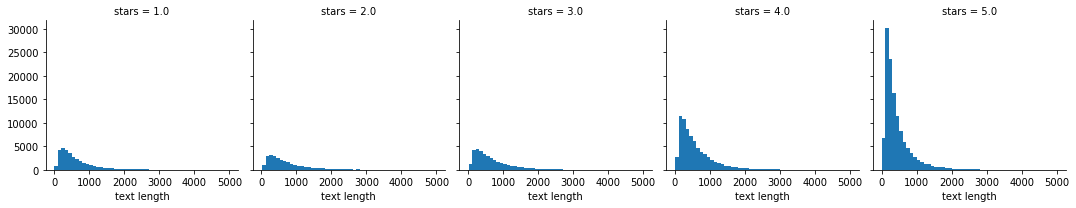

In [ ]:
g = sns.FacetGrid(data=yelp, col='stars')
g.map(plt.hist, 'text length', bins=50)

Text(0.5, 1.0, 'Text Length Distribution')

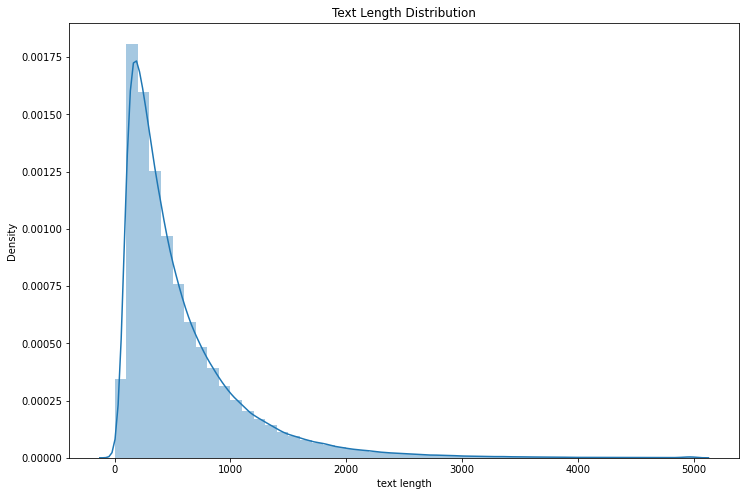

In [ ]:
import warnings
# Text Length
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(12,8))
sns.distplot(yelp['text length'], kde=True, bins=50)
plt.title('Text Length Distribution')

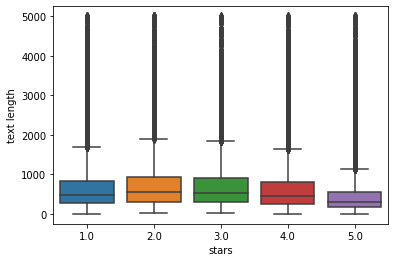

In [ ]:
sns.boxplot(x='stars', y='text length', data=yelp)

Text(0, 0.5, 'count')

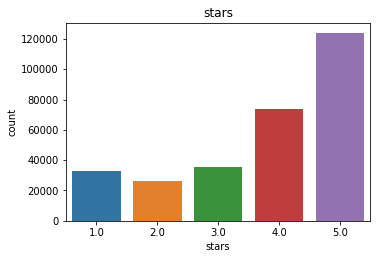

In [ ]:
fig = plt.figure(figsize=(12,8))
axes1 = plt.subplot(2,2,1)
axes1 = sns.countplot(x='stars', data=yelp)
axes1.set_title('stars')
axes1.set_ylabel('count')

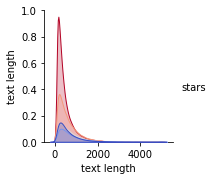

In [ ]:
sns.pairplot(yelp, hue='stars', palette='coolwarm')

##**Text Analysis**

In [ ]:
yelp_text = yelp[['stars', 'text']]
yelp_text.head()

,stars,text
0,4.0,Love going here for happy hour or dinner! Gre...
1,5.0,My friends at work (connoisseurs of good food ...
2,4.0,"Great service, relaxing atmosphere and the foo..."
3,5.0,I went to Brio for the first time on Wednesday...
4,4.0,I usually steer clear of the chain restaurants...


In [ ]:
def remove_punc_stopword(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    remove_punc = [word for word in text if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word.lower() for word in remove_punc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
yelp_text_allstars = yelp_text.copy()
yelp_text_allstars['text'] = yelp_text_allstars['text'].apply(remove_punc_stopword)
yelp_text_allstars.count()

stars    292376
text     292376
dtype: int64

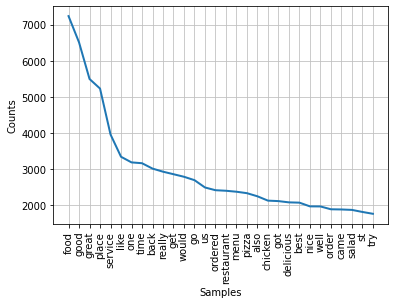

In [ ]:
words_split = []
for i in range(0,9999): 
    for word in yelp_text_allstars['text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

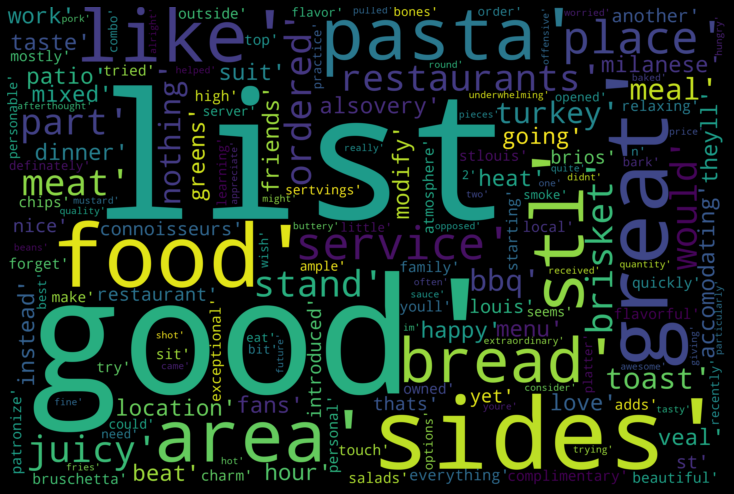

In [ ]:
yelp_allstars_text = yelp_text_allstars['text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(yelp_allstars_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

## **Stars 1 to 5 Words Frequency and Word Cloud**

In [ ]:
# 1 star review
warnings.filterwarnings("ignore")
yelp_text_stars1 = yelp_text[yelp_text['stars']==1]
yelp_text_stars1['text'] = yelp_text_stars1['text'].apply(remove_punc_stopword)
yelp_text_stars1.count()

stars    32873
text     32873
dtype: int64

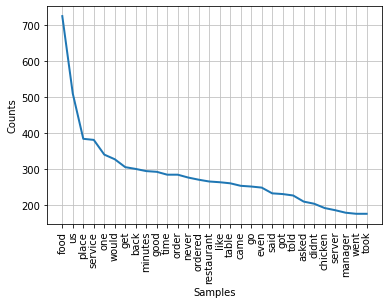

In [ ]:
yelp_text_stars1 = yelp_text_stars1.reset_index(drop=True)
words_split = []
for i in range(0,749): 
    for word in yelp_text_stars1['text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

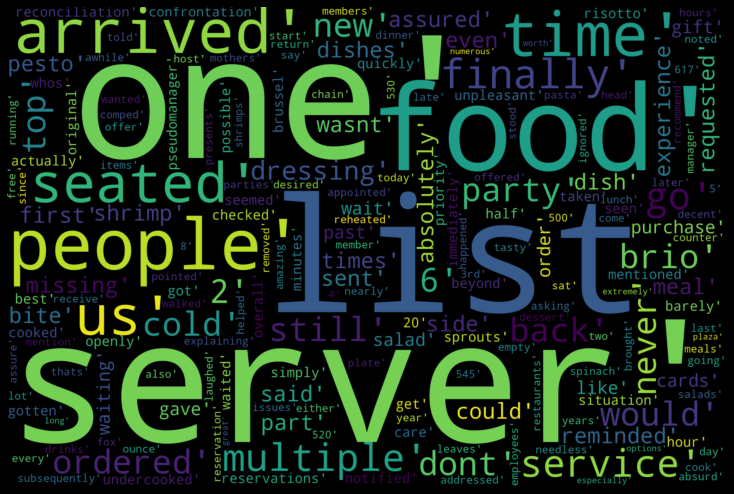

In [ ]:
yelp_stars1_text = yelp_text_stars1['text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(yelp_stars1_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [ ]:
#2 star review
warnings.filterwarnings("ignore")
yelp_text_stars2 = yelp_text[yelp_text['stars']==2]
yelp_text_stars2['text'] = yelp_text_stars2['text'].apply(remove_punc_stopword)
yelp_text_stars2.count()

stars    26263
text     26263
dtype: int64

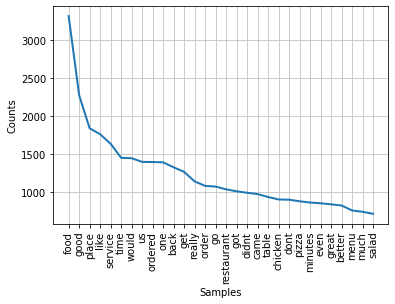

In [ ]:
yelp_text_stars2 = yelp_text_stars2.reset_index(drop=True)
words_split = []
for i in range(0,3337): 
    for word in yelp_text_stars2['text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

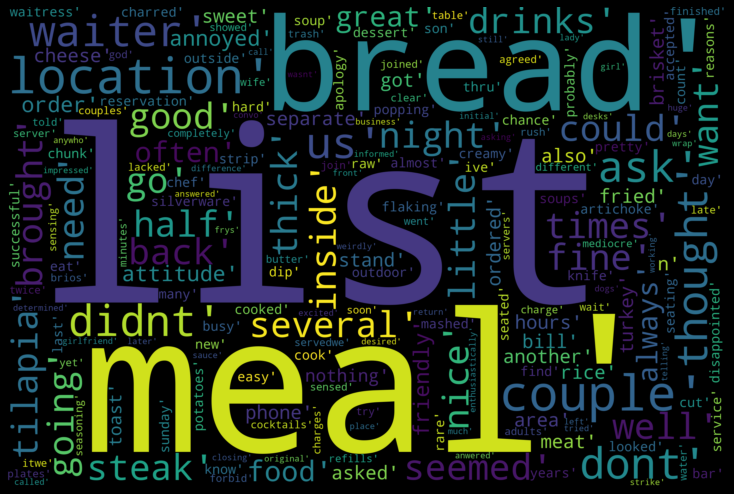

In [ ]:
yelp_stars2_text = yelp_text_stars2['text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(yelp_stars2_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [ ]:
# 3 star review
warnings.filterwarnings("ignore")
yelp_text_stars3 = yelp_text[yelp_text['stars']==3]
yelp_text_stars3['text'] = yelp_text_stars3['text'].apply(remove_punc_stopword)
yelp_text_stars3.count()

stars    35345
text     35345
dtype: int64

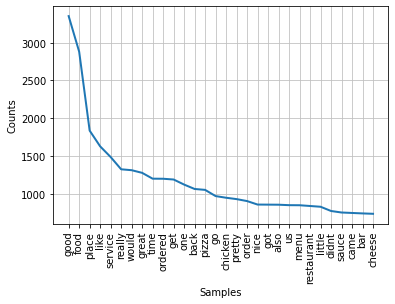

In [ ]:
yelp_text_stars3 = yelp_text_stars3.reset_index(drop=True)
words_split = []
for i in range(0,3337): 
    for word in yelp_text_stars3['text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

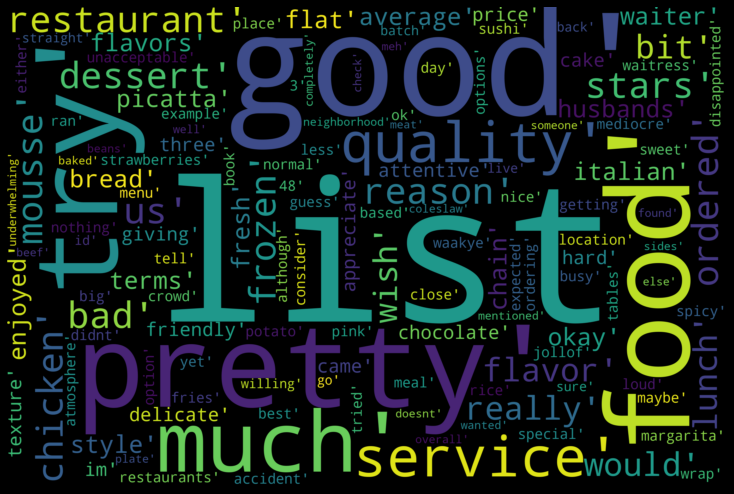

In [ ]:
yelp_stars3_text = yelp_text_stars3['text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(yelp_stars3_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [ ]:
# 4 star review
warnings.filterwarnings("ignore")
yelp_text_stars4 = yelp_text[yelp_text['stars']==4]
yelp_text_stars4['text'] = yelp_text_stars4['text'].apply(remove_punc_stopword)
yelp_text_stars4.count()

stars    73648
text     73648
dtype: int64

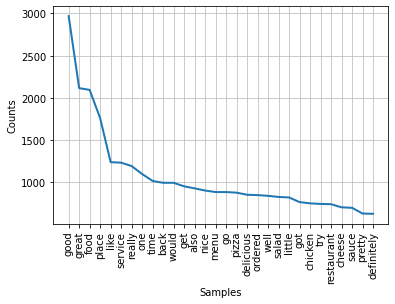

In [ ]:
yelp_text_stars4 = yelp_text_stars4.reset_index(drop=True)
words_split = []
for i in range(0,3337): 
    for word in yelp_text_stars4['text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

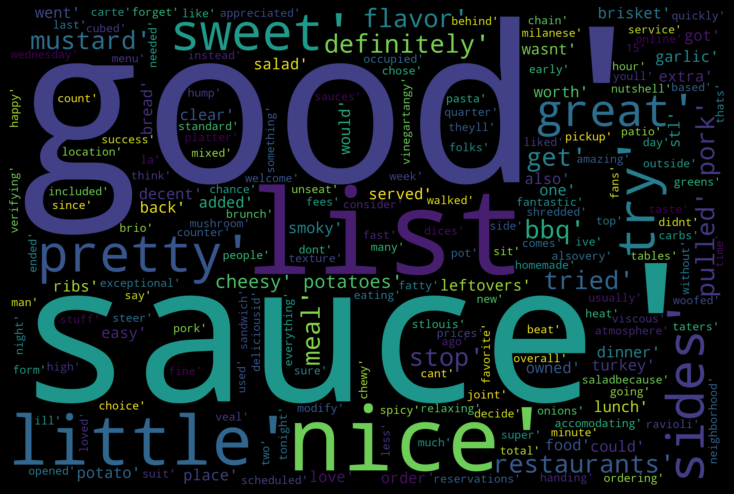

In [ ]:
yelp_stars4_text = yelp_text_stars4['text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(yelp_stars4_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [ ]:
# 5 star review
warnings.filterwarnings("ignore")
yelp_text_stars5 = yelp_text[yelp_text['stars']==5]
yelp_text_stars5['text'] = yelp_text_stars5['text'].apply(remove_punc_stopword)
yelp_text_stars5.count()

stars    124247
text     124247
dtype: int64

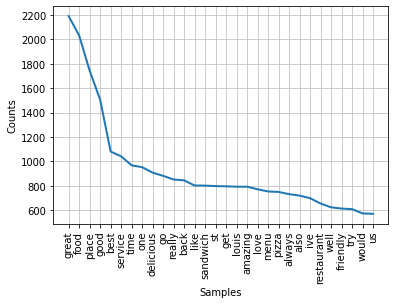

In [ ]:
yelp_text_stars5 = yelp_text_stars5.reset_index(drop=True)
words_split = []
for i in range(0,3337): 
    for word in yelp_text_stars5['text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

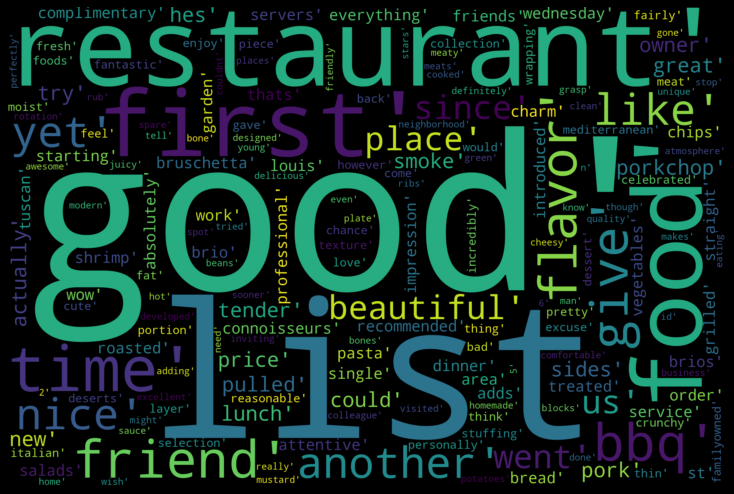

In [ ]:
yelp_stars5_text = yelp_text_stars5['text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(yelp_stars5_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)